In [2]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import get_file, plot_model

In [3]:
sns.set(style='white')
plt.style.use('seaborn-white')

In [4]:
data = pd.read_csv('../work/sofifa/players_20.csv',encoding='utf-8')

In [10]:
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,94,94,95500000,575000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",88,95,70,92,...,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,NaN,37,26,6,11,15,14,8,89+5,89+5,89+5,93+1,93+1,93+1,93+1,93+1,94+0,94+0,94+0,92+2,87+6,87+6,87+6,92+2,68+6,66+6,66+6,66+6,68+6,63+6,53+6,53+6,53+6,63+6
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,93,93,58500000,400000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,94,89,83,...,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,NaN,32,24,7,11,15,14,11,91+2,91+2,91+2,90+0,91+0,91+0,91+0,90+0,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,62+3,62+3,62+3,65+3,61+3,54+3,54+3,54+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,92,92,105500000,300000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker, #Crosser, #...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Prone, Flair, Speed Dribbler (AI), Outs...",87,87,62,87,...,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,NaN,26,29,9,9,15,15,11,84+6,84+6,84+6,91+1,90+2,90+2,90+2,91+1,90+2,90+2,90+2,90+2,83+6,83+6,83+6,90+2,67+6,61+6,61+6,61+6,67+6,61+6,47+6,47+6,47+6,61+6
3,200389,https://sofifa.com/player/200389/jan-oblak/200002,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,77500000,120000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,...,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,89,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,Spain Primera Division,1.0,91,91,90000000,475000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, 

In [8]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
data.corr()

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
sofifa_id,1.000000,-0.735976,-0.092313,-0.202248,-0.027570,-0.445784,0.039701,-0.159430,-0.228633,-0.363053,-0.093892,-0.081642,-0.143316,0.179160,0.144882,0.108064,0.163930,-0.273978,-0.368841,-0.222710,-0.225574,-0.368830,-0.397041,-0.416155,-0.352874,-0.378978,-0.347869,-0.479731,-0.138747,-0.099702,-0.120753,-0.148815,-0.167534,-0.046728,-0.174629,-0.202421,-0.202093,-0.112714,0.119345,0.118304,-0.033027,-0.439053,0.040047,-0.283586,-0.187903,-0.077979,-0.278676,-0.179614,-0.232742,-0.165644,-0.103229,-0.231215,-0.148597,-0.386141,NaN,-0.088615,-0.069757,-0.111345,-0.115011,-0.113113,-0.121864,-0.111751
age,-0.735976,1.000000,0.081663,0.237192,-0.071537,0.465033,-0.261962,0.081360,0.152189,0.259625,0.074868,0.045662,0.065755,-0.225905,-0.123832,-0.121767,-0.201333,0.239706,0.331792,0.162799,0.260167,0.435579,0.430086,0.466940,0.405581,0.416828,0.339860,0.549337,0.128796,0.078961,0.149706,0.136585,0.143498,0.017213,0.142424,0.191202,0.184706,0.088826,-0.152943,-0.144290,-0.022686,0.463315,-0.089618,0.262120,0.185642,0.116808,0.341889,0.162490,0.259683,0.196211,0.086993,0.195763,0.141369,0.370415,NaN,0.116946,0.101640,0.110468,0.113095,0.112690,0.121648,0.111789
height_cm,-0.092313,0.081663,1.000000,0.769319,0.058348,0.040289,-0.002456,0.009823,0.018951,0.037273,-0.176666,-0.430103,0.011374,-0.032201,-0.014978,-0.094290,-0.430986,-0.202878,-0.288912,-0.412783,0.216344,0.491305,0.141382,0.150782,0.083718,0.132060,-0.020872,0.149612,-0.497259,-0.375975,0.010449,-0.370455,-0.350886,-0.499972,-0.447350,-0.408728,-0.334682,-0.425011,-0.558235,-0.474284,-0.634361,-0.019939,-0.790044,-0.173912,-0.041970,-0.291380,0.535481,-0.383866,-0.045295,-0.053552,-0.444928,-0.371337,-0.335177,-0.159193,NaN,-0.068869,-0.077015,0.367869,0.367816,0.365629,0.367577,0.367803
weight_kg,-0.202248,0.237192,0.769319,1.000000,0.004565,0.157001,-0.010938,0.051978,0.065523,0.090246,-0.129825,-0.352222,0.048469,-0.081405,-0.028604,-0.091964,-0.386302,-0.095214,-0.181498,-0.300543,0.218705,0.582461,0.256035,0.270712,0.215399,0.244359,0.079013,0.287441,-0.401008,-0.291715,0.039377,-0.290607,-0.261078,-0.416047,-0.349119,-0.309673,-0.259831,-0.340542,-0.493068,-0.420710,-0.546074,0.090949,-0.669853,-0.056260,0.030283,-0.219445,0.614283,-0.279167,0.030396,-0.028571,-0.355238,-0.280207,-0.246397,-0.053853,NaN,-0.053079,-0.064553,0.342886,0.343932,0.340471,0.344972,0.343656
league_rank,-0.027570,-0.071537,0.058348,0.004565,1.000000,-0.247514,-0.205555,-0.158465,-0.126788,-0.108886,-0.019927,-0.084000,-0.157173,-0.089219,-0.165949,0.050463,-0.022610,-0.120901,-0.194662,-0.169265,-0.085170,-0.045892,-0.187108,-0.195079,-0.192134,-0.190215,-0.005844,-0.215684,-0.085499,-0.063699,-0.057817,-0.128354,-0.082011,-0.086655,-0.086883,-0.076601,-0.128090,-0.100153,-0.011819,-0.009141,-0.017051,-0.212751,-0.012844,-0.134676,-0.005074,-0.014500,-0.023540,-0.085084,-0.060586,-0.061333,-0.080488,-0.132918,-0.063140,-0.151598,NaN,-0.050803,-0.050362,-0.016688,-0.017964,-0.018181,-0.020265,-0.018159
over

In [11]:
dataset = data[['overall','potential','value_eur','wage_eur','international_reputation','movement_reactions']]

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18483 entries, 0 to 18482
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   overall                   18483 non-null  int64
 1   potential                 18483 non-null  int64
 2   value_eur                 18483 non-null  int64
 3   wage_eur                  18483 non-null  int64
 4   international_reputation  18483 non-null  int64
 5   movement_reactions        18483 non-null  int64
dtypes: int64(6)
memory usage: 866.5 KB


In [13]:
dataset['value_eur'].value_counts()

1100000      490
325000       392
450000       370
1200000      350
425000       345
300000       345
275000       340
1000000      327
525000       322
400000       320
375000       319
475000       315
675000       313
550000       300
350000       299
650000       292
750000       291
500000       287
575000       282
625000       275
1300000      251
0            250
725000       237
250000       224
1400000      223
140000       221
800000       213
6500000      211
160000       206
130000       205
775000       201
120000       201
5500000      200
1500000      198
600000       198
875000       197
900000       195
700000       190
110000       189
180000       189
100000       185
950000       179
925000       176
200000       168
850000       167
150000       166
1800000      158
190000       154
170000       154
8000000      153
7000000      151
240000       150
220000       149
60000        147
210000       146
2400000      143
80000        141
1600000      141
8500000      1

In [14]:
dataset = dataset[dataset.value_eur != 0]

In [15]:
dataset['value_eur'].value_counts()

1100000      490
325000       392
450000       370
1200000      350
425000       345
300000       345
275000       340
1000000      327
525000       322
400000       320
375000       319
475000       315
675000       313
550000       300
350000       299
650000       292
750000       291
500000       287
575000       282
625000       275
1300000      251
725000       237
250000       224
1400000      223
140000       221
800000       213
6500000      211
160000       206
130000       205
120000       201
775000       201
5500000      200
600000       198
1500000      198
875000       197
900000       195
700000       190
180000       189
110000       189
100000       185
950000       179
925000       176
200000       168
850000       167
150000       166
1800000      158
170000       154
190000       154
8000000      153
7000000      151
240000       150
220000       149
60000        147
210000       146
2400000      143
80000        141
1600000      141
8500000      134
90000        1

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18233 entries, 0 to 18482
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   overall                   18233 non-null  int64
 1   potential                 18233 non-null  int64
 2   value_eur                 18233 non-null  int64
 3   wage_eur                  18233 non-null  int64
 4   international_reputation  18233 non-null  int64
 5   movement_reactions        18233 non-null  int64
dtypes: int64(6)
memory usage: 997.1 KB


In [17]:
dataset['overall'].value_counts()

66    1152
64    1151
65    1131
68    1062
67    1056
63     953
69     951
70     884
62     872
72     737
71     710
60     700
61     657
73     624
59     545
74     519
75     501
58     486
56     370
57     362
76     349
55     283
77     255
54     236
78     232
53     208
79     180
52     175
80     154
51     120
50     104
82      90
83      81
81      78
49      65
84      49
48      43
85      35
86      18
88      17
87      15
89      13
90       4
91       3
92       1
93       1
94       1
Name: overall, dtype: int64

In [18]:
dataset['potential'].value_counts()

70    1223
68    1206
73    1130
72    1123
69    1115
71    1104
74    1023
67     989
75     961
66     896
76     821
65     788
64     668
77     641
78     629
79     491
63     464
80     413
62     347
81     300
82     288
83     255
61     230
84     214
60     169
85     138
59     122
86     116
87      70
58      65
88      45
57      44
89      37
56      27
55      18
90      16
91       9
54       8
92       7
53       6
93       5
51       4
52       3
50       2
94       1
49       1
95       1
Name: potential, dtype: int64

In [19]:
dataset['international_reputation'].value_counts()

1    16771
2     1123
3      286
4       47
5        6
Name: international_reputation, dtype: int64

In [20]:
dataset['movement_reactions'].value_counts()

62    856
63    844
65    833
64    823
58    823
60    788
66    758
68    704
59    702
61    697
67    648
57    608
55    602
56    588
54    561
70    560
53    531
69    526
52    480
72    479
71    431
73    359
51    357
74    352
50    304
49    294
75    271
48    255
76    213
47    203
78    174
46    166
45    165
77    160
44    100
79     98
43     94
80     89
42     87
82     85
81     77
40     59
41     57
83     53
84     44
39     39
38     35
37     27
85     25
36     22
35     14
86     14
87     14
32     12
33     12
31      9
34      7
89      7
88      7
92      5
28      4
91      4
30      4
90      3
29      3
25      2
93      1
24      1
21      1
27      1
96      1
95      1
Name: movement_reactions, dtype: int64

In [359]:
###reputation = dataset.pop('international_reputation')

In [360]:
###dataset['rep_1'] = (reputation == 1)*1.0
###dataset['rep_2'] = (reputation == 2)*1.0
###dataset['rep_3'] = (reputation == 3)*1.0
###dataset['rep_4'] = (reputation == 4)*1.0
###dataset['rep_5'] = (reputation == 5)*1.0

In [21]:
dataset

,overall,potential,value_eur,wage_eur,international_reputation,movement_reactions
0,94,94,95500000,575000,5,95
1,93,93,58500000,400000,5,96
2,92,92,105500000,300000,5,92
3,91,93,77500000,120000,3,88
4,91,91,90000000,475000,4,90
...,...,...,...,...,...,...
18478,48,56,40000,2000,1,40
18479,48,56,40000,2000,1,41
18480,48,56,40000,2000,1,52
18481,48,54,35000,1000,1,54


In [22]:
dataset.corr()

,overall,potential,value_eur,wage_eur,international_reputation,movement_reactions
overall,1.000000,0.645911,0.644600,0.579248,0.477727,0.864510
potential,0.645911,1.000000,0.583904,0.475801,0.343523,0.516769
value_eur,0.644600,0.583904,1.000000,0.856020,0.623596,0.562860
wage_eur,0.579248,0.475801,0.856020,1.000000,0.655517,0.512004
international_reputation,0.477727,0.343523,0.623596,0.655517,1.000000,0.430029
movement_reactions,0.864510,0.516769,0.562860,0.512004,0.430029,1.000000


In [23]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

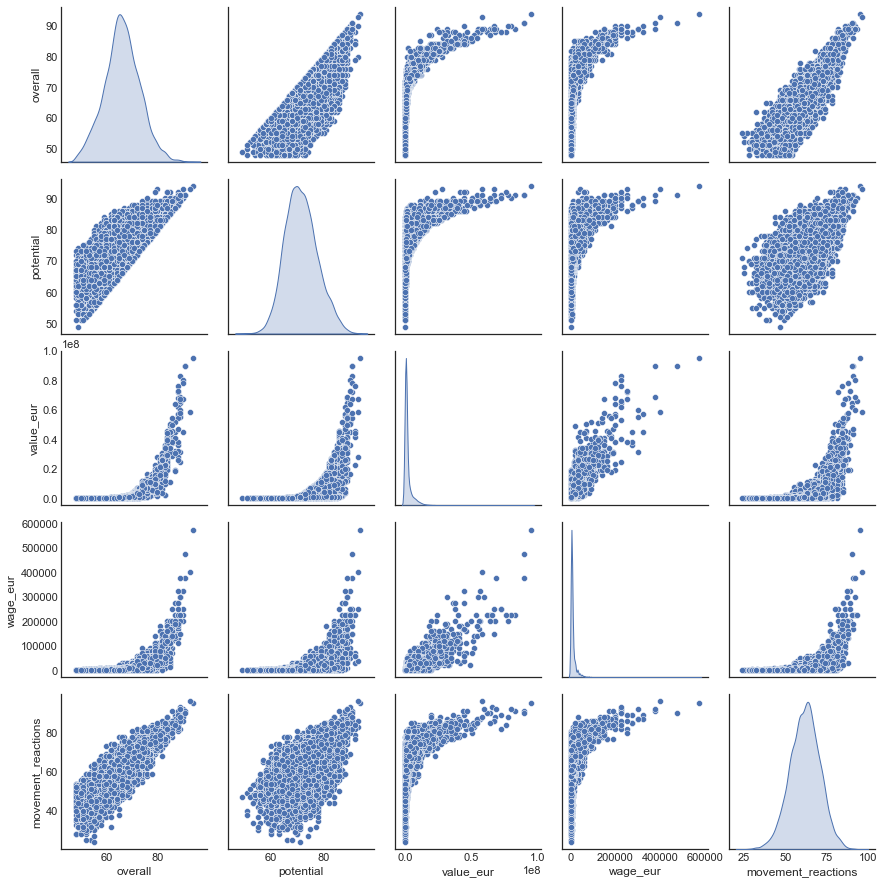

In [24]:
sns.pairplot(train_dataset[['overall', 'potential', 'value_eur', 'wage_eur', 'movement_reactions']], diag_kind='kde');

In [26]:
train_stats = train_dataset.describe()
train_stats.pop('overall')
train_stats = train_stats.transpose()
train_stats

count    14586.000000
mean        66.113808
std          6.940578
min         48.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: overall, dtype: float64

,count,mean,std,min,25%,50%,75%,max
potential,14586.0,7.145448e+01,6.146616e+00,49.0,67.0,71.0,75.0,94.0
value_eur,14586.0,2.462489e+06,5.458511e+06,8000.0,325000.0,700000.0,2000000.0,95500000.0
wage_eur,14586.0,9.604415e+03,2.108705e+04,0.0,2000.0,3000.0,9000.0,575000.0
international_reputation,14586.0,1.101673e+00,3.767515e-01,1.0,1.0,1.0,1.0,5.0
movement_reactions,14586.0,6.164534e+01,9.093000e+00,24.0,56.0,62.0,68.0,96.0


In [366]:
train_labels = train_dataset.pop('overall')
test_labels = test_dataset.pop('overall')

In [367]:
def normalization(x):
    #return(x-min(x)) / (max(x)-min(x))
    return(x- train_stats['mean']) / train_stats['std']
    
normed_train_data = normalization(train_dataset)
normed_test_data = normalization(test_dataset)

#normalization(dataset.value_eur)

In [368]:
#dataset.apply(normalization,axis=0)

In [369]:
#dataset_nor = dataset.apply(normalization,axis=0)

In [370]:
train_labels

8875     66
4226     71
4538     71
7860     67
11170    64
         ..
15423    60
17629    54
3114     73
2147     74
10081    65
Name: overall, Length: 14586, dtype: int64

In [371]:
test_labels

2        92
3        91
10       89
19       89
28       88
         ..
18436    49
18440    48
18449    48
18457    48
18467    48
Name: overall, Length: 3647, dtype: int64

In [372]:
def build_model():
    input = Input(shape=(len(train_dataset.keys())), name='input')
    hidden1 = Dense(128, activation='relu', name='dense1')(input)
    hidden2 = Dense(128, activation='relu', name='dense2')(hidden1)
    output = Dense(1, name='output')(hidden2)
    
    model = Model(inputs=[input], outputs=output)
    
    model.compile(loss='mse', optimizer=RMSprop(0.001), metrics=['mae', 'mse'])

    return model

In [373]:
model = build_model()

In [374]:
model.summary()

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 5)]               0         
_________________________________________________________________
dense1 (Dense)               (None, 128)               768       
_________________________________________________________________
dense2 (Dense)               (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 1)                 129       
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [375]:
plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [376]:
#normed_train_data = train_dataset.apply(normalization,axis=0)
#normed_test_data = test_dataset.apply(normalization,axis=0)

In [377]:
sample_batch = normed_train_data[:10]
sample_result = model.predict(sample_batch)
sample_batch

,potential,value_eur,wage_eur,international_reputation,movement_reactions
8875,0.902207,-0.249608,-0.360620,-0.269867,-0.290921
4226,0.576825,0.043512,-0.408043,-0.269867,0.258953
4538,-0.073939,-0.176328,0.255872,-0.269867,0.478902
7860,0.902207,-0.249608,-0.123508,-0.269867,0.039003
11170,1.064899,-0.272508,-0.076085,-0.269867,-0.070972
11583,-0.399322,-0.368688,-0.123508,-0.269867,-0.070972
861,1.227590,1.747273,2.864108,-0.269867,1.578649
10266,0.251443,-0.336628,-0.360620,-0.269867,-0.620845
15120,-0.399322,-0.400748,-0.431754,-0.269867,-1.060744
9739,-0.887395,-0.327468,-0.218353,-0.269867,-0.400896


In [406]:
epochs = 100

history = model.fit(normed_train_data, train_labels, epochs=epochs, validation_split=0.2)

Epoch 1/100
365/365 [==============================] - 1s 3ms/step - loss: 1.3171 - mae: 0.7424 - mse: 1.3171 - val_loss: 1.6998 - val_mae: 0.8288 - val_mse: 1.6998
Epoch 2/100
365/365 [==============================] - 1s 2ms/step - loss: 1.3280 - mae: 0.7422 - mse: 1.3280 - val_loss: 1.6750 - val_mae: 0.8073 - val_mse: 1.6750
Epoch 3/100
365/365 [==============================] - 2s 4ms/step - loss: 1.3141 - mae: 0.7413 - mse: 1.3141 - val_loss: 1.7052 - val_mae: 0.8337 - val_mse: 1.7052
Epoch 4/100
365/365 [==============================] - 2s 5ms/step - loss: 1.3003 - mae: 0.7384 - mse: 1.3003 - val_loss: 1.7570 - val_mae: 0.8622 - val_mse: 1.7570
Epoch 5/100
365/365 [==============================] - 2s 4ms/step - loss: 1.3579 - mae: 0.7457 - mse: 1.3579 - val_loss: 2.0674 - val_mae: 0.9275 - val_mse: 2.0674
Epoch 6/100
365/365 [==============================] - 1s 4ms/step - loss: 1.3236 - mae: 0.7403 - mse: 1.3236 - val_loss: 1.6887 - val_mae: 0.8080 - val_mse: 1.6887
Epoch 7/10

In [407]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,1.317094,0.742369,1.317094,1.699807,0.828800,1.699807,0
1,1.328045,0.742196,1.328045,1.674989,0.807312,1.674989,1
2,1.314095,0.741319,1.314095,1.705175,0.833742,1.705175,2
3,1.300311,0.738384,1.300311,1.756951,0.862222,1.756951,3
4,1.357921,0.745710,1.357921,2.067369,0.927504,2.067369,4
5,1.323583,0.740276,1.323583,1.688707,0.808019,1.688707,5
6,1.324114,0.740218,1.324114,1.615906,0.808786,1.615906,6
7,1.323520,0.745329,1.323520,1.966521,0.957113,1.966521,7
8,1.310782,0.738376,1.310782,1.641861,0.761244,1.641861,8
9,1.335714,0.737996,1.335714,1.630946,0.773828,1.630946,9


In [408]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print(mae)

114/114 - 0s - loss: 1.4633 - mae: 0.7401 - mse: 1.4633
0.7401135563850403


In [409]:
test_predictions = model.predict(normed_test_data)

In [410]:
test_predictions

array([[95.120255],
       [91.73132 ],
       [93.91269 ],
       ...,
       [49.32368 ],
       [50.310528],
       [49.56263 ]], dtype=float32)

In [411]:
A = pd.merge(test_dataset, dataset, left_index=True, right_index=True)
A

,potential_x,value_eur_x,wage_eur_x,international_reputation_x,movement_reactions_x,overall,potential_y,value_eur_y,wage_eur_y,international_reputation_y,movement_reactions_y
2,92,105500000,300000,5,92,92,92,105500000,300000,5,92
3,93,77500000,120000,3,88,91,93,77500000,120000,3,88
10,95,93500000,150000,3,89,89,95,93500000,150000,3,89
19,89,53000000,350000,5,92,89,89,53000000,350000,5,92
28,89,48000000,225000,4,83,88,89,48000000,225000,4,83
...,...,...,...,...,...,...,...,...,...,...,...
18436,54,30000,1000,1,31,49,54,30000,1000,1,31
18440,73,60000,500,1,47,48,73,60000,500,1,47
18449,67,60000,1000,1,52,48,67,60000,1000,1,52
18457,65,60000,2000,1,49,48,65,60000,2000,1,49


In [412]:
b = A[['overall']]
b

,overall
2,92
3,91
10,89
19,89
28,88
...,...
18436,49
18440,48
18449,48
18457,48


In [413]:
b['Predict Overall'] = test_predictions

C:\Users\TK\anaconda3\envs\dl_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [414]:
b

,overall,Predict Overall
2,92,95.120255
3,91,91.731323
10,89,93.912689
19,89,91.919464
28,88,89.184753
...,...,...
18436,49,51.122257
18440,48,49.323498
18449,48,49.323681
18457,48,50.310528


In [415]:
b['dif'] = b['overall']-b['Predict Overall']

C:\Users\TK\anaconda3\envs\dl_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [402]:
b.head(20)

,overall,Predict Overall,dif
2,92,94.821762,-2.821762
3,91,95.562027,-4.562027
10,89,96.106583,-7.106583
19,89,89.847565,-0.847565
28,88,89.683266,-1.683266
40,87,86.956558,0.043442
43,87,88.723412,-1.723412
52,87,87.110153,-0.110153
55,86,85.858063,0.141937
61,86,87.365158,-1.365158
